In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,23132109,1,Andy Lee,男,270600,https://www.zhihu.com/people/andy-lee-60,《思想实验》《逻辑女孩》《逻辑学的语言》《思维的利剑》的作者,122351336,2016-09-17 08:28:53,46,151,47,这个问题问得太棒了！女人为什么要生孩子？不同于男人为什么要生孩子。生孩子对于女人来说成本更大...
1,23132109,1,林策筝,女,1720,https://www.zhihu.com/people/bluepine,平权主义者 INFP 音乐 电影 文学 心理学 科技爱好者,32897656,2014-11-04 06:39:53,172,352,97,这显然是男权社会的谎言和骗局，先是宣扬男性的肯定是女性价值的基础，没人要的“剩女”是可怕的，...
2,23132109,1,李七凡,女,29132,https://www.zhihu.com/people/gu-yun-96-60,想要当作家的语言爱好者。,117817186,2016-08-19 19:54:46,90,78,19,首先呢，女人生孩子，是因为女人可以。这确实是由生物性决定的。但是我并不认为这是“义务”，而是...
3,23132109,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,33935345,2014-11-24 11:29:17,6,66,12,自己想生，才生。是女人的自由。别人说该生就生，是女人的桎梏
4,23132109,1,一语道出真相,女,207,https://www.zhihu.com/people/holiday-wong-39,记录心路和实践历程。,109257777,2016-07-04 06:22:24,10,40,7,我面对父母高压的“什么年纪干什么事儿”都顽固的不谈恋爱不结婚，就是怕开了这个头，下一个“什么...


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (445, 13)
Shape of DataFrame after removing duplicates: (445, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,23132109,1,Andy Lee,男,270600,https://www.zhihu.com/people/andy-lee-60,《思想实验》《逻辑女孩》《逻辑学的语言》《思维的利剑》的作者,122351336,2016-09-17 08:28:53,46,151,47,这个问题问得太棒了！女人为什么要生孩子？不同于男人为什么要生孩子。生孩子对于女人来说成本更大...
1,23132109,1,林策筝,女,1720,https://www.zhihu.com/people/bluepine,平权主义者 INFP 音乐 电影 文学 心理学 科技爱好者,32897656,2014-11-04 06:39:53,172,352,97,这显然是男权社会的谎言和骗局，先是宣扬男性的肯定是女性价值的基础，没人要的“剩女”是可怕的，...
2,23132109,1,李七凡,女,29132,https://www.zhihu.com/people/gu-yun-96-60,想要当作家的语言爱好者。,117817186,2016-08-19 19:54:46,90,78,19,首先呢，女人生孩子，是因为女人可以。这确实是由生物性决定的。但是我并不认为这是“义务”，而是...
3,23132109,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,33935345,2014-11-24 11:29:17,6,66,12,自己想生，才生。是女人的自由。别人说该生就生，是女人的桎梏
4,23132109,1,一语道出真相,女,207,https://www.zhihu.com/people/holiday-wong-39,记录心路和实践历程。,109257777,2016-07-04 06:22:24,10,40,7,我面对父母高压的“什么年纪干什么事儿”都顽固的不谈恋爱不结婚，就是怕开了这个头，下一个“什么...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一来", "一样", "一般", "一转眼",
    "万一", "上", "上下", "下", "不", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？"
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.602 seconds.
Prefix dict has been built successfully.


0    [问题, 问得, 太棒了, 女人, 要生, 孩子, 不同于, 男人, 要生, 孩子, 生, ...
1    [显然, 男权, 社会, 谎言, 骗局, 先是, 宣扬, 男性, 肯定, 女性, 价值, 基...
2    [女人, 生, 孩子, 是因为, 女人, 确实, 生物性, 决定, 并不认为, 这是, 义务...
3                   [想生, 才生, 女人, 自由, 说, 生就, 生, 女人, 桎梏]
4    [面对, 父母, 高压, 年纪, 干什么, 事儿, 顽固, 谈恋爱, 结婚, 怕, 开, 头...
Name: tokenized_content, dtype: object


In [5]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv


In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.nn.functional import softmax
import time

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using BERT
def bert_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length')
    input_ids_tensor = torch.tensor([input_ids])

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids_tensor)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['tokenized_content'].apply(bert_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 3.3456546942392986 minutes
一共用时:3.3456546942392986分钟
                                   tokenized_content  \
0  ['问题', '问得', '太棒了', '女人', '要生', '孩子', '不同于', '...   
1  ['显然', '男权', '社会', '谎言', '骗局', '先是', '宣扬', '男性...   
2  ['女人', '生', '孩子', '是因为', '女人', '确实', '生物性', '决...   
3  ['想生', '才生', '女人', '自由', '说', '生就', '生', '女人',...   
4  ['面对', '父母', '高压', '年纪', '干什么', '事儿', '顽固', '谈...   

                                     sentiment_probs sentiment_label  
0  [0.22377626597881317, 0.1454366147518158, 0.63...         Neutral  
1  [0.22194181382656097, 0.15524905920028687, 0.6...         Neutral  
2  [0.22785434126853943, 0.14698757231235504, 0.6...         Neutral  
3  [0.264449805021286, 0.4092002213001251, 0.3263...        Negative  
4  [0.2145148664712906, 0.14772143959999084, 0.63...         Neutral  


In [7]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,验,骗,骨,高,魔,鸡,麻,黄,鼻,龄
0,2452,696,347,0,0,0,0,0,0,0,...,1,0,0,5,0,0,0,0,0,0
1,1369,390,194,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,2,0,1
2,2643,752,375,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,59,18,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,878,256,127,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,10,20,30,一下,一个,一代,一件,一句,一天,一天天,...,难受,需求,需要,非常,面对,顺产,风险,马上,高,麻烦
0,0,0,0,0,7,0,1,0,0,0,...,0,0,3,0,0,0,1,0,4,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,6,0,0,0,0,0,...,0,0,1,4,0,0,2,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


         10   20   30   一下        一个   一代        一件   一句   一天  一天天  ...   难受  \
0  0.000000  0.0  0.0  0.0  0.122132  0.0  0.036555  0.0  0.0  0.0  ...  0.0   
1  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
2  0.000000  0.0  0.0  0.0  0.103721  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
3  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  ...  0.0   
4  0.235484  0.0  0.0  0.0  0.159942  0.0  0.000000  0.0  0.0  0.0  ...  0.0   

    需求        需要        非常        面对   顺产        风险   马上         高        麻烦  
0  0.0  0.090114  0.000000  0.000000  0.0  0.043501  0.0  0.164570  0.000000  
1  0.0  0.000000  0.000000  0.000000  0.0  0.171251  0.0  0.000000  0.000000  
2  0.0  0.029762  0.117016  0.000000  0.0  0.086202  0.0  0.040764  0.041849  
3  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.000000  
4  0.0  0.000000  0.000000  0.245538  0.0  0.000000  0.0  0.000000  0.000000  

[5 rows x 651 columns]


In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0      6.669020               0
1      6.731885               1
2      7.971989               2
3      2.144519               3
4      6.465213               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index             Top Terms
0      6.669020               0   [女性, 孩子, 社会, 女人, 生]
1      6.731885               1  [母亲, 女性, 回报, 丈夫, 女人]
2      7.971989               2  [女性, 照顾, 女人, 男人, 本能]
3      2.144519               3    [女人, 想生, 自由, 生, 说]
4      6.465213               4   [应该, 正常, 疼, 面对, 年纪]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


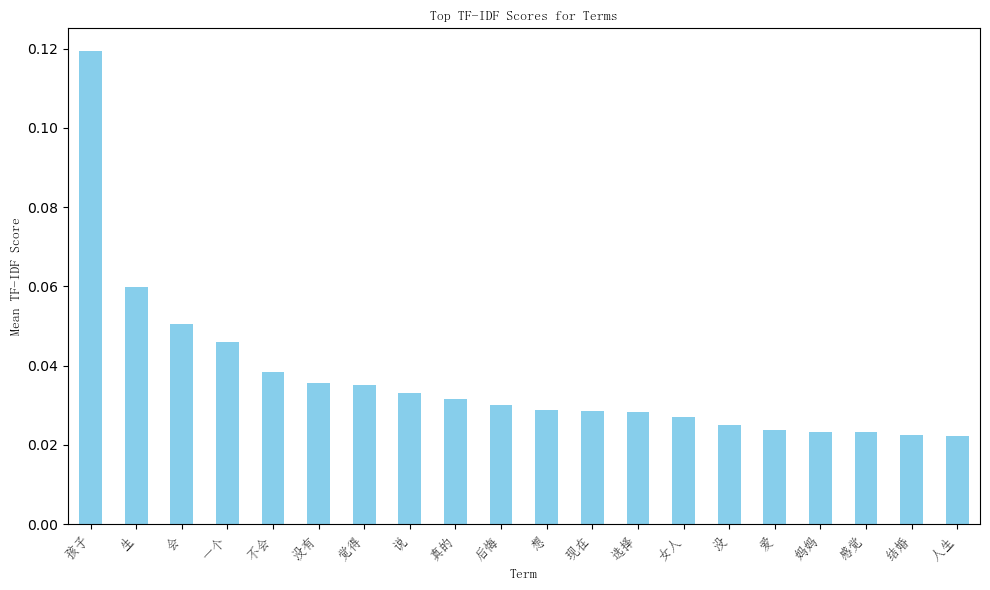

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Fonts\simfang.ttf'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

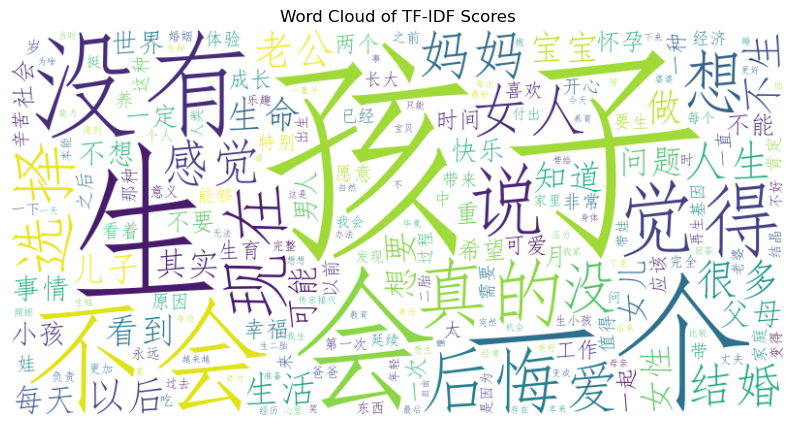

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (444, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


In [17]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [18]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [19]:
from pyLDAvis import save_html

output_directory = "C://Users//jesse//Desktop//Master Thesis//02_Experiments_with_Answers//Have_Babies//BERT_Test//"
output_filename = 'Have_Babies_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory + output_filename)
print("Visualized content has been saved to: ", output_directory, output_filename)


Visualized content has been saved to:  C://Users//jesse//Desktop//Master Thesis//02_Experiments_with_Answers//Have_Babies//BERT_Test// Have_Babies_lda_visualization.html


In [20]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory + output_filename)


True

In [21]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


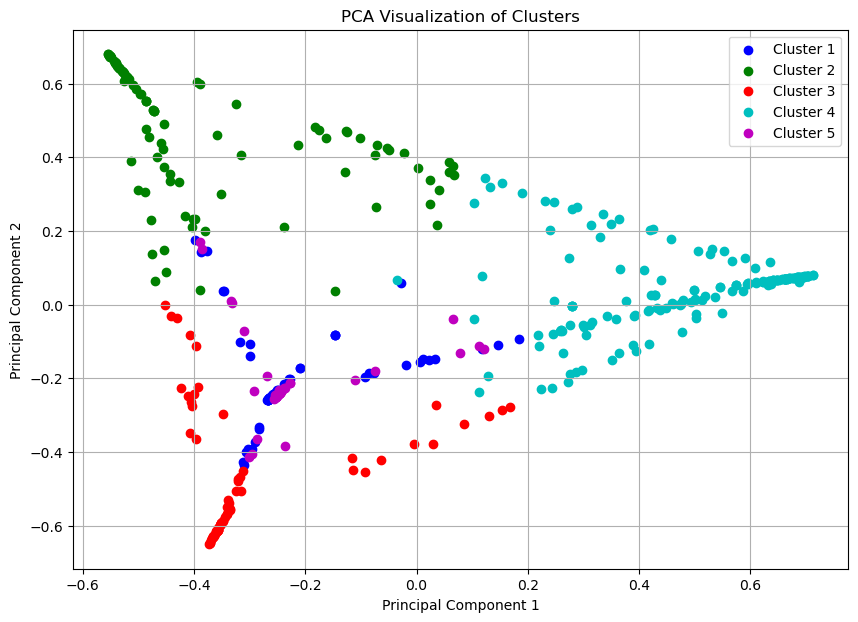

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 5  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Have_Babies\BERT_Test\Merged_Have_Babies.csv


In [24]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 女儿 麻烦 妈 感觉 会 延续 妊娠 妈妈 天使 丈夫
Cluster 2 Most Frequent Words: 孩子 女人 生 女性 男人 爱 结婚 人类 社会 本能
Cluster 3 Most Frequent Words: 每天 儿子 孩子 后悔 永远 完整 没有 吃 喜欢 那种
Cluster 4 Most Frequent Words: 孩子 不会 后悔 妈妈 真的 麻烦 想 妈 生 小孩
Cluster 5 Most Frequent Words: 社会 生育 妈妈 想 女性 一个 做 说 个人 第一次

Ten Top Terms for Each Cluster
Cluster 1 top terms: 孩子 觉得 宝宝 一个 感觉 真的 没有 生命 女儿 老公
Cluster 2 top terms: 孩子 女人 一个 女性 没有 选择 男人 社会 结婚 很多
Cluster 3 top terms: 孩子 没有 每天 一个 觉得 儿子 妈妈 后悔 生活 现在
Cluster 4 top terms: 孩子 一个 真的 觉得 现在 不会 后悔 没有 老公 以后
Cluster 5 top terms: 孩子 社会 女性 生育 一个 妈妈 现在 男性 女人 现代


In [25]:
# Now you can group the narratives by their assigned thematic clusters
grouped_clusters = df.groupby('cluster_label')

# Iterate over each thematic cluster and access the narratives within each cluster
for cluster_label, group_df in grouped_clusters:
    print(f"Cluster {cluster_label + 1}:")
    print(group_df['tokenized_content'].head())  # Here we pass the already tokenized text instead of the original content
    print()


Cluster 1:
6     ['今天', '正好', '协调', '个事', '女', '婆婆', '关系', '不好'...
19    ['文艺', '孩子', '丈夫', '生命', '延续', '爱', '结晶', '粗暴'...
20                                           ['想', '生']
48    ['昨天', '电影', '完美', '陌生人', '里面', '有个', '兽医', '以...
57                                                ['爱']
Name: tokenized_content, dtype: object

Cluster 2:
0    ['问题', '问得', '太棒了', '女人', '要生', '孩子', '不同于', '...
1    ['显然', '男权', '社会', '谎言', '骗局', '先是', '宣扬', '男性...
2    ['女人', '生', '孩子', '是因为', '女人', '确实', '生物性', '决...
3    ['想生', '才生', '女人', '自由', '说', '生就', '生', '女人',...
5    ['雌性', '怀孕', '生育', '哺乳', '这是', '自然', '演化', '动物...
Name: tokenized_content, dtype: object

Cluster 3:
8     ['孩子', '肯定', '礼物', '没有', '孩子', '女人', '完整', '为啥...
26    ['刚刚', '生完', '月', '子里', '觉得', '思想', '发生', '巨大'...
32    ['后悔', '身材', '走样', '满肚子', '妊娠', '纹', '没有', '空'...
81    ['辛辛苦苦', '努力', '赚钱', '工作', '之前', '读', '书写', '作...
89    ['讨厌', '我妈', '我生', '下来', '说', '破坏', '人生', '这么着...
Name: tokenized_content, dtype: object

Cluster 4:
4

In [26]:
# Initialize an empty dictionary to store the sentiment distribution for each cluster
sentiment_distribution = {}

# Iterate over each cluster
for cluster, group_df in grouped_clusters:
    # Count the occurrences of each sentiment label in the current cluster
    label_counts = group_df['sentiment_label'].value_counts()
    
    # Calculate the total number of narratives in the current cluster
    total_narratives = label_counts.sum()
    
    # Calculate the proportion of each sentiment label and store it in the sentiment distribution dictionary
    sentiment_distribution[cluster] = {
        'Positive': label_counts.get('Positive', 0) / total_narratives,
        'Negative': label_counts.get('Negative', 0) / total_narratives,
        'Neutral': label_counts.get('Neutral', 0) / total_narratives
    }

# Print the sentiment distribution for each cluster
for cluster, distribution in sentiment_distribution.items():
    print(f"Cluster {cluster + 1}:")
    for sentiment, proportion in distribution.items():
        print(f"   {sentiment}: {proportion:.2%}")
    print()


Cluster 1:
   Positive: 0.00%
   Negative: 59.02%
   Neutral: 40.98%

Cluster 2:
   Positive: 0.00%
   Negative: 41.41%
   Neutral: 58.59%

Cluster 3:
   Positive: 0.00%
   Negative: 51.47%
   Neutral: 48.53%

Cluster 4:
   Positive: 0.00%
   Negative: 46.15%
   Neutral: 53.85%

Cluster 5:
   Positive: 0.00%
   Negative: 57.45%
   Neutral: 42.55%



In [27]:
import pandas as pd
import gc

def get_dataframes_in_memory():
    """
    Get the names and number of DataFrames currently in memory.
    """
    dataframes = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    return dataframes

# Print the names and number of DataFrames currently in memory
dataframes_in_memory = get_dataframes_in_memory()
num_dataframes = len(dataframes_in_memory)
print(f"Number of DataFrames in memory: {num_dataframes}")

if num_dataframes > 0:
    print("Names of DataFrames in memory:")
    for name, _ in dataframes_in_memory:
        print(name)

Number of DataFrames in memory: 14
Names of DataFrames in memory:
__
___
df
_1
duplicate_rows
_3
dtm_df
_8
_9
tfidf_df
document_tfidf_df
topic_prob_df
cluster_data
group_df
